##### Financial Data
1. Non-stationary and have high level of noise
2. Model Evaluation > Model Building
3. Most often used models
    Multiple Linear Regression

What is done here
1. Associating using 2 or more r.v.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

housing = pd.read_csv('housing.csv', index_col=0)

In [ ]:
"""
+ve -> one variable increases, the other variable also increases
-ve -> one variable increases, the other variable decreases
0 -> relationship is minimal
"""
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [8]:
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


# Scatter Matrix
-> Consider using Scatter Matrix Plot in future, easy to use and the graph looks nice as well

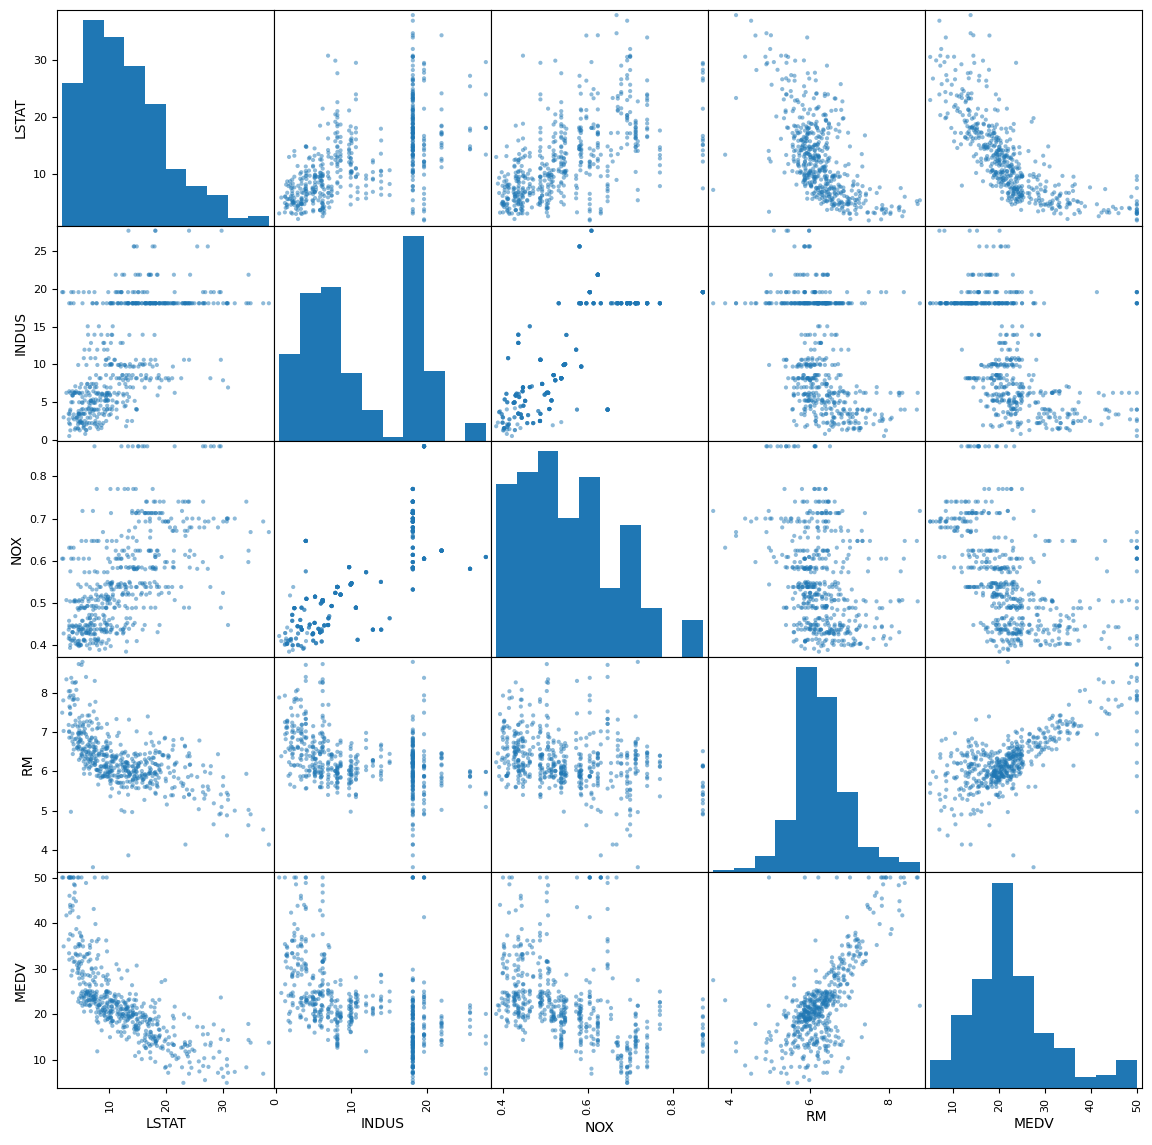

In [ ]:
# Scatter Matrix Plot
from pandas.plotting import scatter_matrix
graphs = scatter_matrix(housing, figsize=(14, 14))

# Strong Linear Pattern between MEDV and RM

<Axes: xlabel='LSTAT', ylabel='MEDV'>

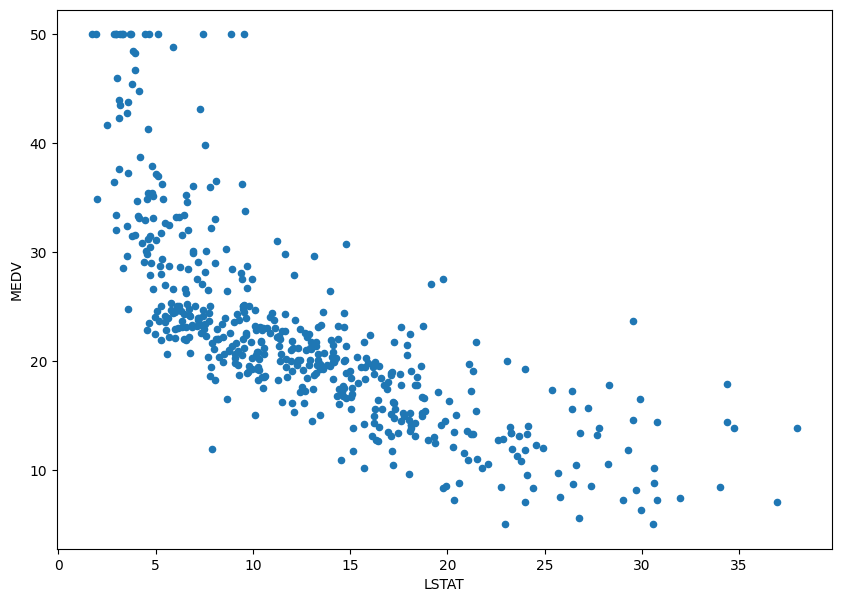

In [ ]:
# Analysis of LSTAT and MEDV
housing.plot(kind='scatter', x='LSTAT', y='MEDV',figsize=(10, 7))

# Leaning towards a weak negative correlation with multiple outliers at low LSTAT values

In [ ]:
# Plotting a regression line by guessing the parameters
b0 = 1
b1 = 2
housing['GuessResponse'] = b0 + b1 * housing['RM']

In [ ]:
# Finding the error of the guess
# Find the difference between the actual and guessed values
housing['ObservedError'] = housing['MEDV'] - housing['GuessResponse']
indices = [7, 20, 100]
print(housing['ObservedError'].loc[indices])

7      13.756
20      1.460
100    13.046
Name: ObservedError, dtype: float64


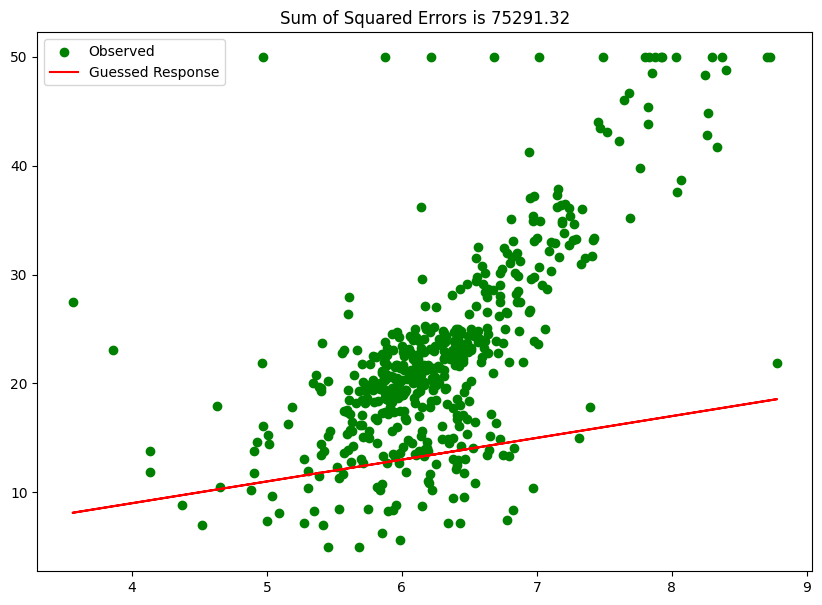

In [43]:
# Plot the estimated line
plt.figure(figsize=(10, 7))
plt.title('Sum of Squared Errors is {}'.format(round(((housing['ObservedError'])**2).sum(),2)))
plt.scatter(housing['RM'], housing['MEDV'], color = 'green', label = 'Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color = 'red', label = 'Guessed Response')
plt.legend()
plt.show()

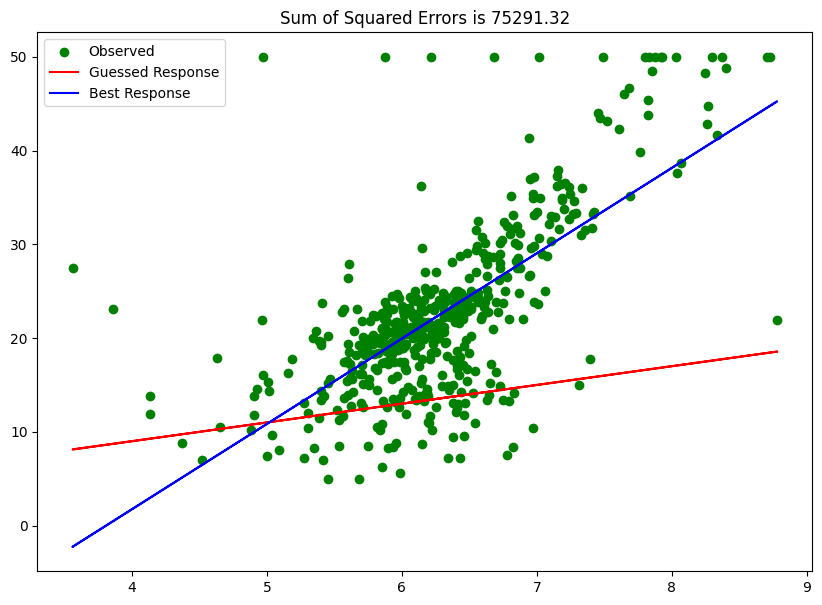

In [50]:
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ RM', data=housing).fit()

b0_ols = model.params.iloc[0]
b1_ols = model.params.iloc[1]

housing['BestResponse'] = b0_ols + b1_ols * housing['RM']

#Error of Guess
housing['Error'] = housing['MEDV'] - housing['BestResponse']

plt.figure(figsize=(10, 7))
plt.title('Sum of Squared Errors is {}'.format(round(((housing['ObservedError'])**2).sum(),2)))
plt.scatter(housing['RM'], housing['MEDV'], color = 'green', label = 'Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color = 'red', label = 'Guessed Response')
plt.plot(housing['RM'], housing['BestResponse'], color = 'blue', label = 'Best Response')
plt.legend()
plt.show()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 09 May 2025   Prob (F-statistic):           2.49e-74
Time:                        18:37:14   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""